In [2]:
# Imports
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the preprocessed data and evaluation results
df = pd.read_csv('data/cryogenic_synthetic_preprocessed.csv')

In [6]:
# Check columns to ensure we have 'Timestamp' and other relevant columns
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['Timestamp', 'Temperature (°C)', 'Anomaly'], dtype='object')


In [7]:
# Check if the 'Timestamp' column exists and handle accordingly
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
else:
    print("Warning: 'Timestamp' column not found. Please check the column names.")
    # If needed, you can rename or select the correct column for dates.
    # Example: df['Timestamp'] = pd.to_datetime(df['YourDateColumn'])

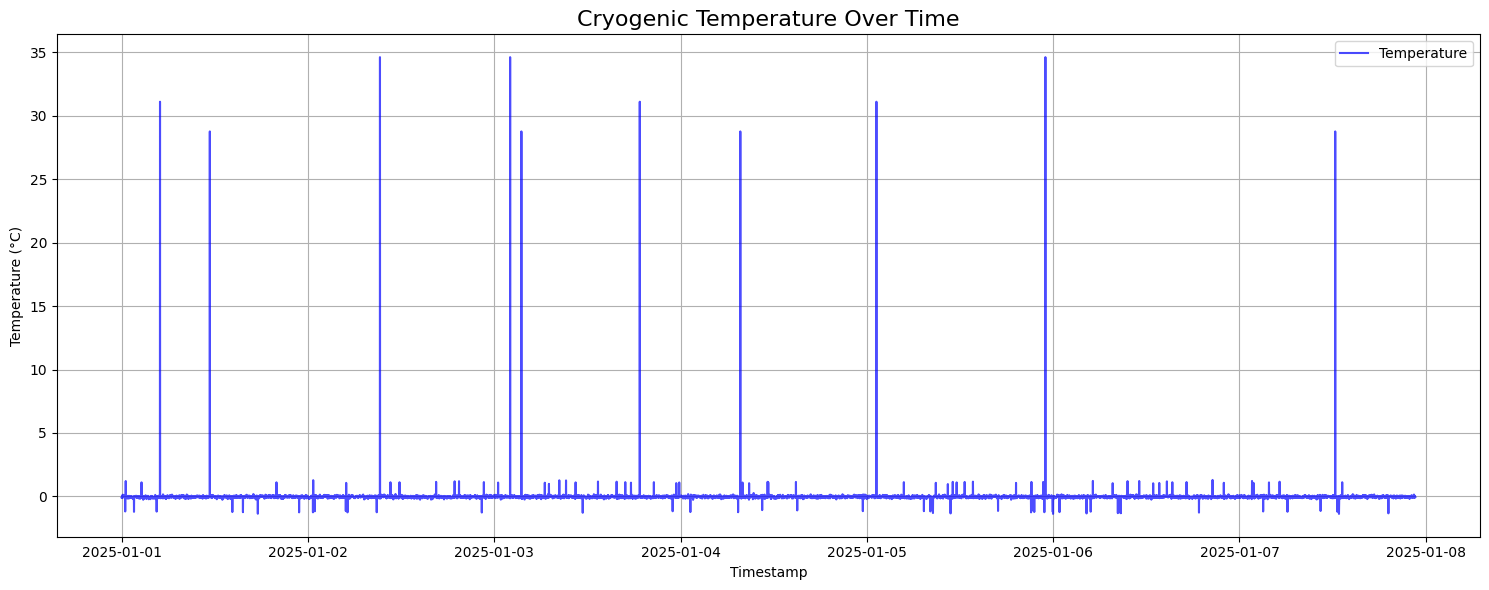

In [8]:
# Plot Temperature over Time
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature', color='blue', alpha=0.7)
plt.title("Cryogenic Temperature Over Time", fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
# Load evaluation results
eval_df = pd.read_csv('outputs/evaluation_results.csv')

# Pivot to make 'Metric' column values into index
eval_df.set_index('Metric', inplace=True)

In [19]:
# Extract required metrics
metrics = ['Precision', 'Recall', 'MAE', 'RMSE']
values = [eval_df.loc[m, 'Value'] for m in metrics]

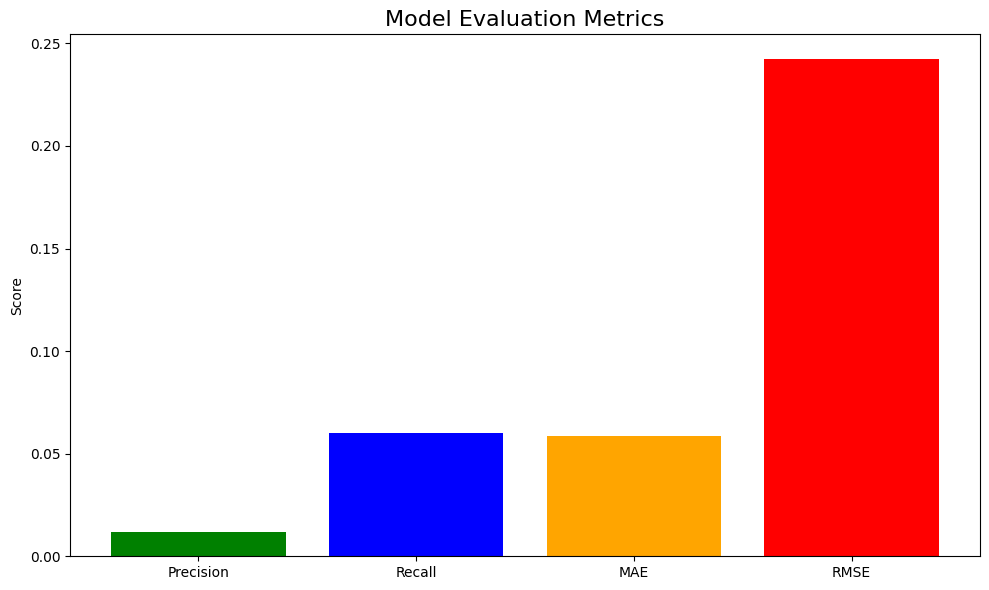

In [20]:
# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['green', 'blue', 'orange', 'red'])
plt.title('Model Evaluation Metrics', fontsize=16)
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [21]:
# Plot Reconstructed Loss Distribution
if 'Reconstructed_Loss' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['Reconstructed_Loss'], bins=50, color='gray', alpha=0.7)
    plt.title('Distribution of Reconstructed Loss', fontsize=16)
    plt.xlabel('Loss Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
# Save final anomaly visualization
if 'Predicted_Anomaly' in df.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature', color='blue', alpha=0.7)
    plt.scatter(df.loc[anomaly_indices, 'Timestamp'], df.loc[anomaly_indices, 'Temperature (°C)'], color='red', label='Detected Anomalies', s=10)
    plt.title('Detected Anomalies in Cryogenic Temperature (Final)', fontsize=16)
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (°C)')
    plt.tight_layout()
    plt.legend()
    plt.savefig('outputs/detected_anomalies_final.png')
    plt.close()

In [23]:
# Export insights
with open('outputs/insights.txt', 'w') as f:
    f.write("Model Evaluation Results:\n")
    for metric in metrics:
        value = eval_df.loc[metric, 'Value']
        f.write(f"{metric}: {value:.4f}\n")
    f.write("\nDetected anomalies are visualized in the final chart.\n")
    f.write("Visualizations have been saved in the 'outputs' folder.\n")

print("✅ Visualization and insights completed.")

✅ Visualization and insights completed.
